### Задача с семинара II.8.4

$$ A = \begin{pmatrix}
-2 & 1 \\
0 & 2
\end{pmatrix};\ \vec{f} = \begin{pmatrix}
3 \\
1
\end{pmatrix}$$

$$ B = A^T A = \begin{pmatrix}
4 & -2 \\
-2 & 5
\end{pmatrix};\ \vec{g} = A^T \vec{f} = \begin{pmatrix}
-6 \\
5
\end{pmatrix} $$

Итерационный процесс выглядит следующим образом: $ \vec{x}^{(p+1)} = ( E - \tau B ) \vec{x}^{(p)} + \tau \vec{ g }$

In [213]:
import numpy as np 
import matplotlib.pyplot as plt

In [214]:
def TauOpt( A ):
    
    LambdaMax = max( np.linalg.eig( A )[ 0 ] )
    
    LambdaMin = min( np.linalg.eig( A )[ 0 ] )
    
    return 2.0 / ( LambdaMax + LambdaMin )

In [215]:
def Norm3( vec ):
    
    S = 0.0
    
    for v in vec:
        
        S += np.fabs( v ) ** 2
        
    return np.sqrt( S )

In [216]:
A = np.asarray( [ [ -2., 1. ],[ 0., 2. ] ] )

f = np.asarray( [ 3., 1. ] )

B = np.dot( A.transpose(), A )

g = np.dot( A.transpose(), f )

R = np.eye( 2 ) - TauOpt( B ) * B

phi = TauOpt( B ) * g

### Отслеживание решения по невязке

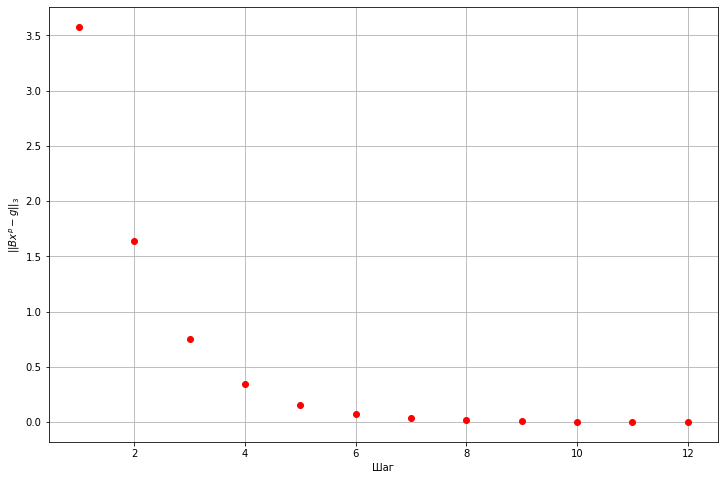

In [217]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'$ || Bx^{p} - g ||_{3} $' )

x = np.zeros( 2 )

k = 0

eps = 1.0e-3

while Norm3( np.dot( B, x ) - g ) > eps:
    
    k += 1
    
    x = np.dot( R, x ) + phi
    
    plt.plot( [ k, ], [ Norm3( np.dot( B, x ) - g ), ], 'ro' )

In [218]:
print( 'Решение системы =', x )

Решение системы = [-1.24989317  0.49995727]


### Отслеживание решения по приближению к точному

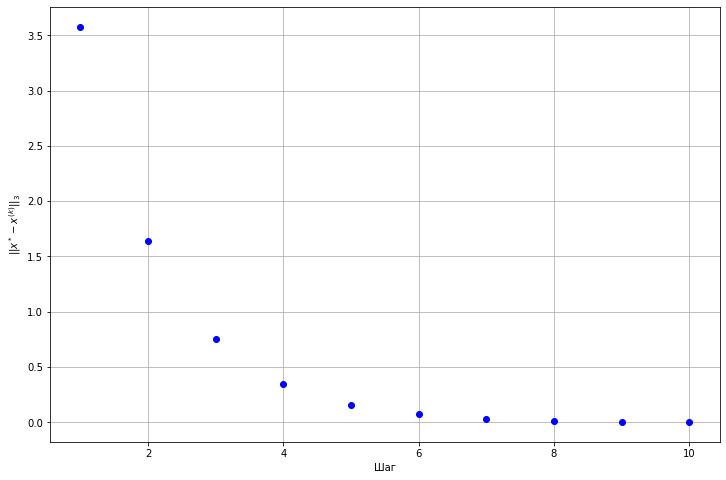

In [219]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'$ || x^* - x^{(k)} ||_{3} $' )

x = np.zeros( 2 )

k = 0

eps = 1.0e-3

while Norm3( np.linalg.solve( B, g ) - x ) > eps:
    
    k += 1
    
    x = np.dot( R, x ) + phi
    
    plt.plot( [ k, ], [ Norm3( np.dot( B, x ) - g ), ], 'bo' )

In [220]:
print( 'Решение системы =', x )

Решение системы = [-1.24949099  0.49979639]


### Отслеживание решения по двум соседним значениям

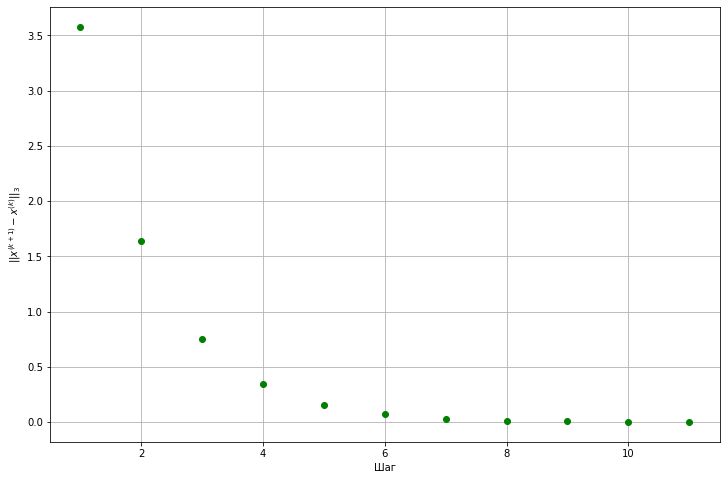

In [221]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'$ || x^{(k+1)} - x^{(k)} ||_{3} $' )

x = np.zeros( 2 )

k = 0

eps = 1.0e-3

x_old = np.ones( 2 ) * 1.0

while Norm3( x_old - x ) > eps:
    
    k += 1
    
    x_old = np.copy( x )
    
    x = np.dot( R, x ) + phi
    
    plt.plot( [ k, ], [ Norm3( np.dot( B, x ) - g ), ], 'go' )

In [222]:
print( 'Решение системы =', x )

Решение системы = [-1.25003393  0.50024885]


# Численное решение нелинейных уравнений

Так как численное решение нелинейных уравнений происходит с помощью итерационных методов, рассмотрим их решение

### Методы бывают:

#### Двухточечными

* деления отрезка пополам

* секущих

* адаптированный м. Бренда (объединяющий лучшие черты двух предыдущих)


#### Одноточечными

* МПИ

* Метод установления

* м. Ньютона

Двухточечные используют понятие локализации корня – т.е. отрезка, на краях которого функция принимает значения с разными знаками. Для одноточечных локализация не нужна. Все двухточечные относятся к классу методов исключения отрезков. Обобщению на многомерие подлежат только одноточечные методы, т.к. для СНУ нет понятия локализации корня.

В методах, использующих локализацию корня, останов итераций при заданной точности $\varepsilon > 0$ вычисления положения корня осуществить просто: когда длина очередного отрезка локализации $$|a_n - b_n| < \varepsilon$$ итерационный процесс останавливается.

Для одноточечных линейно сходящихся методов (МПИ) итерационный процесс следует остановить при выполнении оценки $$||x* - x^{(n)}||< \varepsilon$$

Так как точное решение $x^*$ неизвестно, то это условие на практике в
явном виде проверить невозможно. Здесь поступают следующим образом.
Введем величину $$||x^{(n)} - x^{(n-1)}||$$, которая называется итерационной поправкой. Иногда требуют просто, чтобы итерационная поправка не превосходила заданного значения точности: $$||x^{(n)} - x^{(n-1)}||< \varepsilon $$

$$||x* - x^{(n)}|| = ||x^{\infty} - x^{(n)}|| = ||x^{(n)} - x^{(n+1)} + x^{(n+1)} - x^{(n+2)} + x^{(n+2)}-...-x^{\infty}|| \leq$$ $$ \leq ||x^{(n)} - x^{(n+1)}||+||x^{(n+1)} - x^{(n+2)}||+||x^{(n+2)} - x^{(n+3)}||+...\leq ||x^{(n)} - x^{(n+1)}||(1+q+q^2+...)=$$ $$=||x^{(n)} - x^{(n+1)}|| \frac{1}{1-q} \leq \varepsilon$$

Таким образом, мы видим, что для достижения заданной точности крите-
рий в терминах итерационной поправки нужно переформулировать
следующим образом: $$||x^{(n)} - x^{(n+1)}|| \leq \varepsilon (1-q)$$

Величина $q$ в оценке должна уточняться на итерациях: $$q = \frac{||x^{(n)} - x^{(n-1)}||}{||x^{(n-1)} - x^{(n-2)}||}$$

### Задача IV.11.9

Для нелинейной системы уравнений

$$
\left\{
\begin{aligned}
xy - x^2 &= 1.03 \\
-2x^3 + y^2 &= 1.98
\end{aligned}
\right.
$$

известны приближенные значения корней $x^0 = 1,\ y^0 = 2$.

Показать, что для уточнения корней можно воспользоваться итерационной схемой

$$ x_{k+1} = ( ( y_k^2 - 1.98 ) / 2 ) ^{1/3},\ y_{k+1} = x_{k} + 1.03 / x_{k} $$

Оценить количество итераций, достаточное для уменьшения первоначальной погрешности не менее чем в $10^4$

#### Решение

Примем, что 

$$ \Phi_1 = x_{k+1} = ( ( y_k^2 - 1.98 ) / 2 ) ^{1/3},\ \Phi_2 = y_{k+1} = x_{k} + 1.03 / x_{k} $$

Тогда невязка

$$r^{k+1} =
\begin{pmatrix}
x^{k+1} \\
y^{k+1}
\end{pmatrix} - 
\begin{pmatrix}
x^{k} \\
y^{k}
\end{pmatrix} = 
\begin{pmatrix}
\Phi_1(y^{k}) - \Phi_1(y^{k-1}) \\
\Phi_2(x^{k}) - \Phi_2(x^{k-1})
\end{pmatrix} = J(\vec{x}) \begin{pmatrix}
x^{k} - x^{k-1} \\
y^{k} - y^{k-1}
\end{pmatrix}
$$

где
$$ J(\vec{x}) = 
\begin{pmatrix}
0 & \frac{y'_k}{3}( ( y_k^2 - 1.98 ) / 2 ) ^{-2/3} \\
1 - 1.03 / x_k^2 & 0
\end{pmatrix} (**)
$$

$$||r^{k+1}||_1 = ||J(\vec{x})||_1||r^{k}||_1 =...= (||J(\vec{x})||_1)^k||r^{1}||_1 $$

Таким образом принимая $||J(\vec{x})||_1 = q$:

$$||r^{k+1}||_1 = \frac{q^k}{1-q} || \vec{x^1} - \vec{x^0} ||$$

Из условия задачи получаем, что значение выражения $ q^k/(1-q) $ должно ровняться $1/10^4$, тогда количество итераций $K = \log_{q}((1-q) / 10^4)$

$$q =||J(x^0, y^0)||_1 = 0.6$$

Значит

$K = \log_{0.6}((1-0.6) / 10^4) = \log_{0.6}(0.00004) = \ln(0.00004) / \ln(0.6) = 20$

Реализуем данный итерационный процесс

In [223]:
import numpy as np
import matplotlib.pyplot as plt

### Первый способ

In [224]:
def Iteration( x_old, y_old ):
    
    x_new = ( ( y_old ** 2 - 1.98 ) / 2.0 ) ** ( 1.0 / 3.0 )
    
    y_new = x_old + 1.03 / x_old
    
    return x_new, y_new

In [225]:
def Norm1( vec ):
    
    Max = np.fabs( vec[ 0 ] )
    
    for v in vec:
        
        if Max <= np.fabs( v ):
            
            Max = np.fabs( v )
            
    return Max

In [226]:
q = 0.6

eps = 1.0e-4

x, x_old = 1., 0.

y, y_old = 2., 0.

Err = []

for k in np.arange( 0, 10000, 1 ):
    
    x_old = x
    
    y_old = y
    
    if q ** k / ( 1.0 - q ) <= eps:
        
        break
        
    x, y = Iteration( x, y )
    
    Err.append( Norm1( [ x - x_old, y - y_old] ) )

In [227]:
print( 'количество итераций =', k, '\n', 'решение системы =', [ x, y ] )


количество итераций = 20 
 решение системы = [1.0228491849497898, 2.0298402596413743]


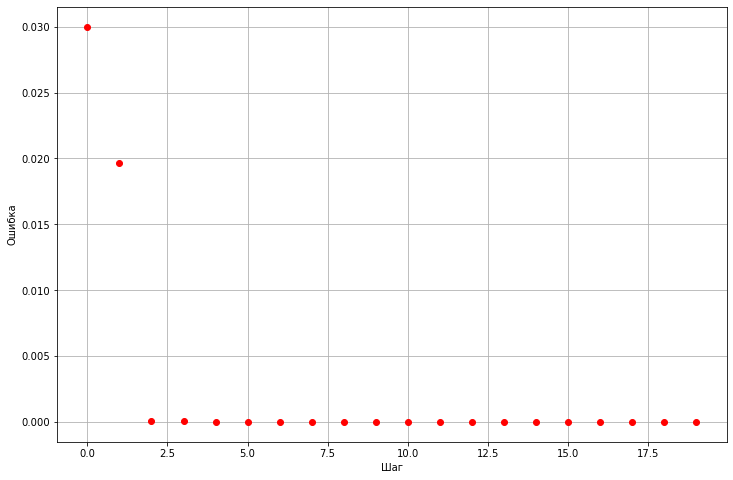

In [228]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'Шаг' )
plt.ylabel( r'Ошибка' )

plt.plot( np.arange( 0, k, 1 ), Err, 'ro' )

### Второй способ

Рассмотрим уравнение $$\vec{F(\vec{u})} = 0\ (1)$$

Данную систему можно представить в эквивалентном виде $$\vec{u} = \vec{f}(\vec{u})$$

Тогда следующие приближения к решению данной системы можно строить как последовательность итераций $$ \vec{u}^{(n+1)} = f(\vec{u}^{(n)})$$

Метод Ньютона для систем нелинейных уравнений $(1)$ является обобщением метода Ньютона для одного нелинейного уравнения. Линеаризуем систему уравнений $(1)$ в окрестности предыдущего приближения

$$ \vec{F(\vec{u}^{(k+1)})} = \vec{F(\vec{u}^{(k)})} + J (\vec{u}^{(k+1)} - \vec{u}^{(k)}) = 0 $$

Здесь $J$ матрица Якоби имеет вид:

$$ J = \frac{d\vec{F}}{d\vec{u}} = \begin{pmatrix}
\partial F_1 / \partial u_1 & ... & \partial F_1 / \partial u_n \\
... & ... & ... \\
\partial F_n / \partial u_1 & ... & \partial F_n / \partial u_n
\end{pmatrix}$$

Тогда следующее приближение к корню может быть построено как 

$$ \vec{u}^{(k+1)} = \vec{u}^{(k)} - J^{-1} \vec{F}(\vec{u}^{(k)}) $$

Для решения данной системы воспользуемся методом Ньютона

Матрица Якоби для данной системы:

$$ J = \frac{d\vec{F}}{d\vec{u}} = \begin{pmatrix}
y - 2x & x \\
-6x^2 & 2y
\end{pmatrix} $$

In [229]:
def Jacobian( u ):
    
    J = np.zeros( ( 2, 2 ) )
    
    J[ 0 ][ 0 ] = u[ 1 ] - 2.0 * u[ 0 ]
    
    J[ 0 ][ 1 ] = u[ 0 ]
    
    J[ 1 ][ 0 ] = - 6.0 * u[ 0 ] ** 2
    
    J[ 1 ][ 1 ] = 2.0 * u[ 1 ]
    
    return J

In [230]:
def F( u ):
    
    F = np.zeros( 2 )
    
    F[ 0 ] = u[ 0 ] * u[ 1 ] - u[ 0 ] ** 2 - 1.03
    
    F[ 1 ] = - 2.0 * u[ 0 ] ** 3 + u[ 1 ] ** 2 - 1.98
    
    return F
    

In [231]:
u = np.ones( 2 )
u[ 1 ] = 2.

u_old = np.zeros( 2 )

eps = 1.0e-4

k = 0

while Norm1( u - u_old ) > 1.0e-4:
    
    k += 1
    
    u_old = np.copy( u )
    
    u = u - np.dot( np.linalg.inv( Jacobian( u ) ), F( u ) )

In [232]:
print( 'количество итераций =', k, '\n', 'решение системы =', u )

количество итераций = 3 
 решение системы = [1.02284918 2.02984026]
